<a href="https://colab.research.google.com/github/nagym72/machine-learning-implementations-with-pytorch/blob/main/Autoencoder_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
tensor_transforms = transforms.ToTensor()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = datasets.MNIST(root = "./data",
                         transform=tensor_transforms, train=True,
                         download=True)

loader = torch.utils.data.DataLoader(dataset=dataset,
                                     batch_size=64,
                                     shuffle=True)


In [ ]:
class NN_Encoder(torch.nn.Module):
  def __init__(self, input_size):
    super().__init__()

    #we store input size as feature belonging to this class
    self.input_size = input_size

    #encoder block
    self.encoder = torch.nn.Sequential(
      torch.nn.Linear(input_size, 256),
      torch.nn.ReLU(),
      torch.nn.Linear(256, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 12),
      torch.nn.ReLU(),
      torch.nn.Linear(12, 4)
    )  

    #decoder block
    self.decoder = torch.nn.Sequential(
      torch.nn.Linear(4, 12),
      torch.nn.ReLU(),
      torch.nn.Linear(12, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 256),
      torch.nn.ReLU(),
      torch.nn.Linear(256, input_size),
      #ToTensor() transform will scale our input pixels to [0,1] so we need a function to rescale our decoded 28*28 to values in the range of
      # [0,1] back to reconstruct the image
      torch.nn.Sigmoid()
      )  
    
  def forward(self, x):
    encoded = self.encoder(x)
    reconstructed = self.decoder(encoded)
    return reconstructed    


In [ ]:
input_img_size = 28*28


model = NN_Encoder(input_img_size).to(device)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3,
                             weight_decay=1e-5)


In [ ]:
epochs = 20
outputs = []
losses = []

for epoch in range(epochs):
  for (image, _) in loader:
    #reshape image to form (Batchsize, 784)
    img = image.reshape(-1, 28*28)
    #push to gpu
    img = img.to(device)
    #make predictions
    predicted = model(img)
    #backtransform to original form
    #evaluate losses
    loss = criterion(predicted, img)

    #set gradients zero, calculate losses, update optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    losses.append(loss.to("cpu"))
    

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, predicted))      




Epoch:1, Loss:0.0328
Epoch:2, Loss:0.0367
Epoch:3, Loss:0.0349
Epoch:4, Loss:0.0384
Epoch:5, Loss:0.0350
Epoch:6, Loss:0.0320
Epoch:7, Loss:0.0402
Epoch:8, Loss:0.0323
Epoch:9, Loss:0.0288
Epoch:10, Loss:0.0373
Epoch:11, Loss:0.0276
Epoch:12, Loss:0.0333
Epoch:13, Loss:0.0298
Epoch:14, Loss:0.0332
Epoch:15, Loss:0.0277
Epoch:16, Loss:0.0374
Epoch:17, Loss:0.0354
Epoch:18, Loss:0.0285
Epoch:19, Loss:0.0320
Epoch:20, Loss:0.0317


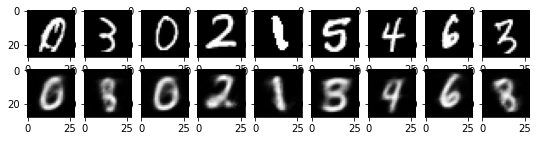

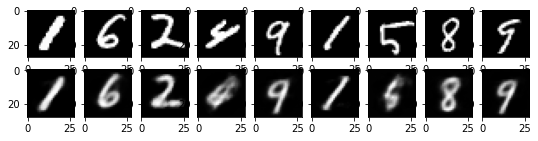

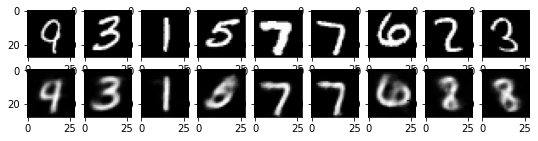

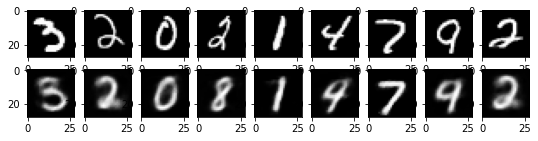

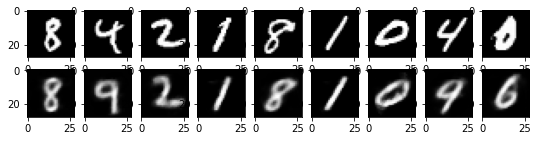

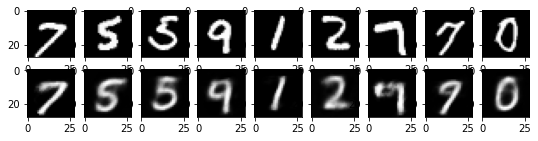

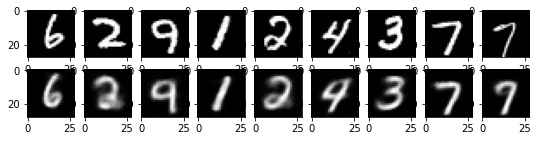

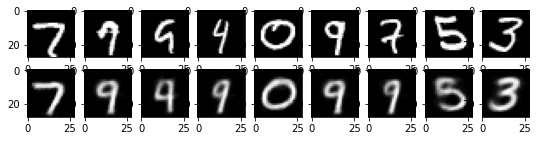

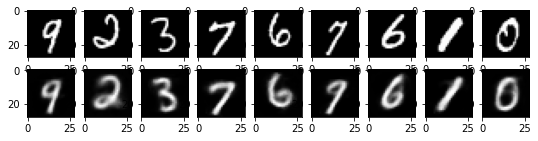

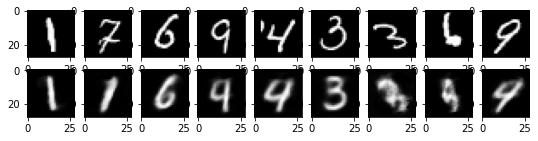

In [ ]:
for k in range(0, epochs, 2):
    plt.figure(figsize=(9, 2))
    plt.gray()
    #take from k epoch the predicted and the original image and convert them back to numpy arrays
    imgs = outputs[k][1].to("cpu").detach().numpy()
    recon = outputs[k][2].to("cpu").detach().numpy()
    #
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])